Basic Forecasting using the statsmodel library - specifically using the ARIMA (AutoRegressive Integrated Moving Average) approach

In [48]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

In [49]:
# Read CPI data
df = pd.read_csv('CPIH_INDEX_Monthly.csv')

In [50]:
# Extract dates and CPI values
dates = df["Date"]
values = df["Value"]
data = pd.DataFrame({'ds': dates, 'y': values})

In [51]:
# Fit ARIMA model
model = ARIMA(data['y'], order=(24, 2, 6))  
# ARIMA(p=no. of lag variable considered, d=differencing, q=moving average) ord

result = model.fit()

c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\elian\anaconda3\envs\mac_workshop\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# Forecast
forecast_steps = 3  # Forecasting 3 months ahead
forecast = result.forecast(steps=forecast_steps)  

# # Calculate the standard errors
# stderr = np.sqrt(result.forecast(steps=forecast_steps))  # Taking square root of variance to get standard deviation

# # Calculate confidence intervals manually based on the forecast and standard errors
# z_score = 0.674  # For a 50% confidence interval
# conf_int = np.array([forecast - z_score * stderr, forecast + z_score * stderr]).T

In [53]:
# Create dates for the forecast period

# Define the number of months you want to generate
n = 3

last_month = df['Date'].iloc[-1]

last_date = datetime.strptime(last_month, '%Y %b')

# Generate the next n months
next_months = [last_date + timedelta(days=31*i) for i in range(1, n+1)]

# Format the next months back to the desired format ('YYYY MMM')
future_dates = [date.strftime('%Y %b').upper() for date in next_months]

KeyError: 0

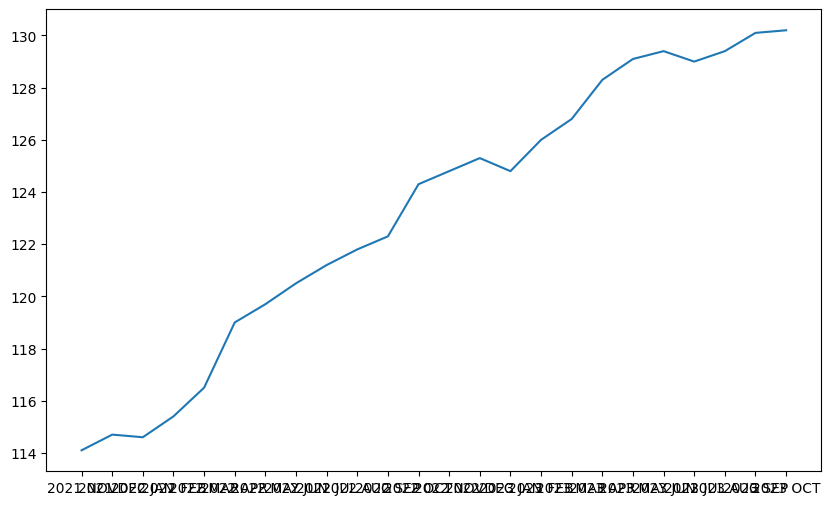

In [55]:
# Plotting the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['ds'][-24:], data['y'][-24:], label='Original Data')
plt.plot([[df['Date'][-1:][0]], future_dates[0:1][0]], [df['Value'][-1:][0], forecast[0:1][0]], color='red', linestyle='dashed' )
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('CPIH INDEX 00: ALL ITEMS 2015=100 (% from 2015)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()